<a href="https://colab.research.google.com/github/deweyey/2022_project/blob/main/5%2C6%EC%A3%BC%EC%B0%A8_%EB%AF%B8%EC%85%98___%EB%93%80%EB%B9%84%EB%93%80%EB%B0%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 프로젝트 주제 : 연령별 인구 구성 비율

1) 유소년, 중장년, 노년층 인구 구성 비율 막대그래프

2) 총 인구수와 노년층 비율 비교 그래프 (막대+꺾은선 그래프)

(비교를 시작하고 싶은 년도와 비교 간격을 사용자가 지정하여 그래프를 그릴 수 있도록 함.)


In [7]:
# 한글 파일 설치

!apt-get install fonts-nanum -qq > /dev/nall
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


비교를 시작하고 싶은 년도는?(2010년 이후, 숫자로 입력) :2010
비교하고 싶은 간격은?(1~12 사이 숫자로 입력) :2


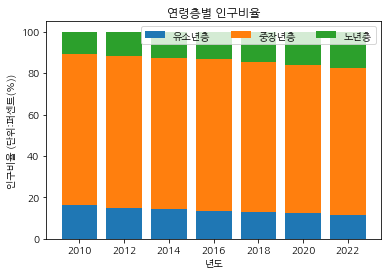

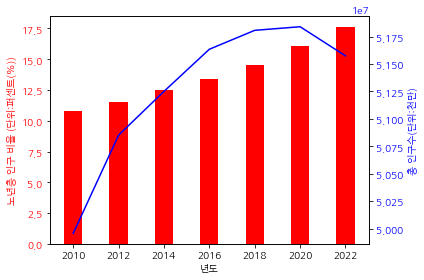

In [8]:
import csv

# 필요한 리스트 만들기

age = []
age_percent = []
for i in range(3) :
  age.append([])
  age_percent.append([])

# 시작 년도와 년도 간격 지정

year = []
while True :
  want = input('비교를 시작하고 싶은 년도는?(2010년 이후, 숫자로 입력) :')
  if int(want) < 2009 :
    print('시작 년도를 다시 입력하세요.')
    print('------------------------------------')
  else :
    break
while True :
  gap = input('비교하고 싶은 간격은?(1~12 사이 숫자로 입력) :')
  if int(gap) > 13 or int(gap) < 1 :
    print('년도 간격을 다시 입력하세요.')
    print('------------------------------------')
  else :
    break

for i in range(int(want), 2023, int(gap)) :
  year.append(i)

total = []
bottom = []

data10 = csv.reader(open('age_2010.csv', encoding='cp949'))
data11 = csv.reader(open('age_2011.csv', encoding='cp949'))
data12 = csv.reader(open('age_2012.csv', encoding='cp949'))
data13 = csv.reader(open('age_2013.csv', encoding='cp949'))
data14 = csv.reader(open('age_2014.csv', encoding='cp949'))
data15 = csv.reader(open('age_2015.csv', encoding='cp949'))
data16 = csv.reader(open('age_2016.csv', encoding='cp949'))
data17 = csv.reader(open('age_2017.csv', encoding='cp949'))
data18 = csv.reader(open('age_2018.csv', encoding='cp949'))
data19 = csv.reader(open('age_2019.csv', encoding='cp949'))
data20 = csv.reader(open('age_2020.csv', encoding='cp949'))
data21 = csv.reader(open('age_2021.csv', encoding='cp949'))
data22 = csv.reader(open('age_2022.csv', encoding='cp949'))

# 데이터마다 반복할 함수

def data_append(data) : 

  youth = 0
  middle = 0
  old = 0
  plus = 0
  bottom_plus = 0

  for row in data :
    if '전국' in row[0] :
      for e in range(3,18) :
        youth = youth + int(row[e])
      age[0].append(youth)
      for e in range(18,68) :
        middle = middle + int(row[e])
      age[1].append(middle)
      for e in range(68,104) :
        old = old + int(row[e])
      age[2].append(old)
      plus = youth + middle + old
      total.append(plus)
      age_percent[0].append(round(int(youth)/int(plus)*100,1))
      age_percent[1].append(round(int(middle)/int(plus)*100,1))
      age_percent[2].append(round(int(old)/int(plus)*100,1))
      bottom_plus = round(int(youth)/int(plus)*100+ int(middle)/int(plus)*100,1)
      bottom.append(bottom_plus)
      break

# year 리스트에 포함하는 년도 데이터에 대해 반복

if 2010 in year :
  data_append(data10)
if 2011 in year :
  data_append(data11)
if 2012 in year :
  data_append(data12)
if 2013 in year :
  data_append(data13)
if 2014 in year :
  data_append(data14)
if 2015 in year :
  data_append(data15)
if 2016 in year :
  data_append(data16)
if 2017 in year :
  data_append(data17)
if 2018 in year :
  data_append(data18)
if 2019 in year :
  data_append(data19)
if 2020 in year :
  data_append(data20)
if 2021 in year :
  data_append(data21)
if 2022 in year :
  data_append(data22)


# 연령층별 인구 비율 그래프 그리기

import matplotlib.pyplot as plt

pos = range(len(year))

bar1 = plt.bar(pos, age_percent[0], label = "유소년층")
bar2 = plt.bar(pos, age_percent[1], bottom = age_percent[0], label = "중장년층")
bar3 = plt.bar(pos, age_percent[2], bottom = bottom, label = "노년층")

plt.xticks(pos, year)

plt.rc('font', family = 'NanumGothic')
plt.title('연령층별 인구비율')

plt.ylabel('인구비율 (단위:퍼센트(%))')
plt.xlabel('년도')
plt.legend(ncol = 4)
plt.show()

# 총 인구수와 노년층 인구 비율 그래프 그리기

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.set_xlabel('년도')
ax1.set_ylabel('노년층 인구 비율 (단위:퍼센트(%))', color = 'red' )
ax1.bar(year, age_percent[2], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  
ax2.set_ylabel('총 인구수(단위:천만)', color='blue') 
ax2.plot(year, total, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.show()